In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [121]:
os.chdir("/content/drive/MyDrive/Brain Dead IPL Dataset")

In [122]:
# Load datasets
team_stats = pd.read_csv("team_stat.csv")
player_stats = pd.read_csv("player_stats.csv")


team_season_stats = pd.read_csv('team_season_stats.csv')
seasonal_stats = pd.read_csv('seasonal_stat.csv')
top_bowlers_stats = pd.read_csv('top_bowlers_stats.csv')


In [123]:
# Print column names
print("Team Stats Columns:", team_stats.columns.tolist())
print("\nPlayer Stats Columns:", player_stats.columns.tolist())
print("\nTeam Season Stats Columns:", team_season_stats.columns.tolist())
print("\nSeasonal Stats Columns:", seasonal_stats.columns.tolist())
print("\nTop Bowlers Stats Columns:", top_bowlers_stats.columns.tolist())

Team Stats Columns: ['team_name', 'match_played', 'matches_won', 'win_percentage', 'total_batting_run', 'total_balls_faced', 'run_rate', 'total_bowling_run', 'total_overs_bowled', 'economy_rate', 'total_4s', 'total_6s', 'highest_score', 'lowest_score', 'powerplay_batting_run', 'powerplay_count', 'powerplay_wickets', 'powerplay_bowling_run', 'powerplay_boundary_count', 'powerplay_dot_count', 'average_powerplay_score', 'death_runs', 'death_count', 'average_death_score']

Player Stats Columns: ['player', 'match_count', 'total_run_bat', 'balls_faced', 'total_wicket', 'total_run_bowl', 'balling_over', '6_count', '4_count', '2_count', '1_count', 'batting_average', 'strike_rate', 'bowling_economy', 'highest_run', 'MOTM_count']

Team Season Stats Columns: ['team_name', 'season_no', 'total_runs', 'total_matches', 'average_score']

Seasonal Stats Columns: ['Season no', 'Year', 'total_run_in_season', 'total_number_of_innings', 'average_run_per_match', 'targets_200+', 'orange_cap_holder', 'orange_

In [124]:
team_name_mapping = {
    'Royal Challengers Bengaluru': 'RCB',
    'Punjab Kings': 'PBKS',
    'Delhi Capitals': 'DC',
    'Mumbai Indians': 'MI',
    'Kolkata Knight Riders': 'KKR',
    'Rajasthan Royals': 'RR',
    'Sunrisers Hyderabad': 'SRH',
    'Chennai Super Kings': 'CSK',
    'Kochi Tuskers Kerala': 'KTK',
    'Pune Warriors': 'PW',
    'Gujarat Lions': 'GL',
    'Rising Pune Supergiant': 'RPS',
    'Lucknow Super Giants': 'LSG',
    'Gujarat Titans': 'GT'
}

# Replace team names with short forms
team_stats['team_name'] = team_stats['team_name'].replace(team_name_mapping)

1) Team Analysis

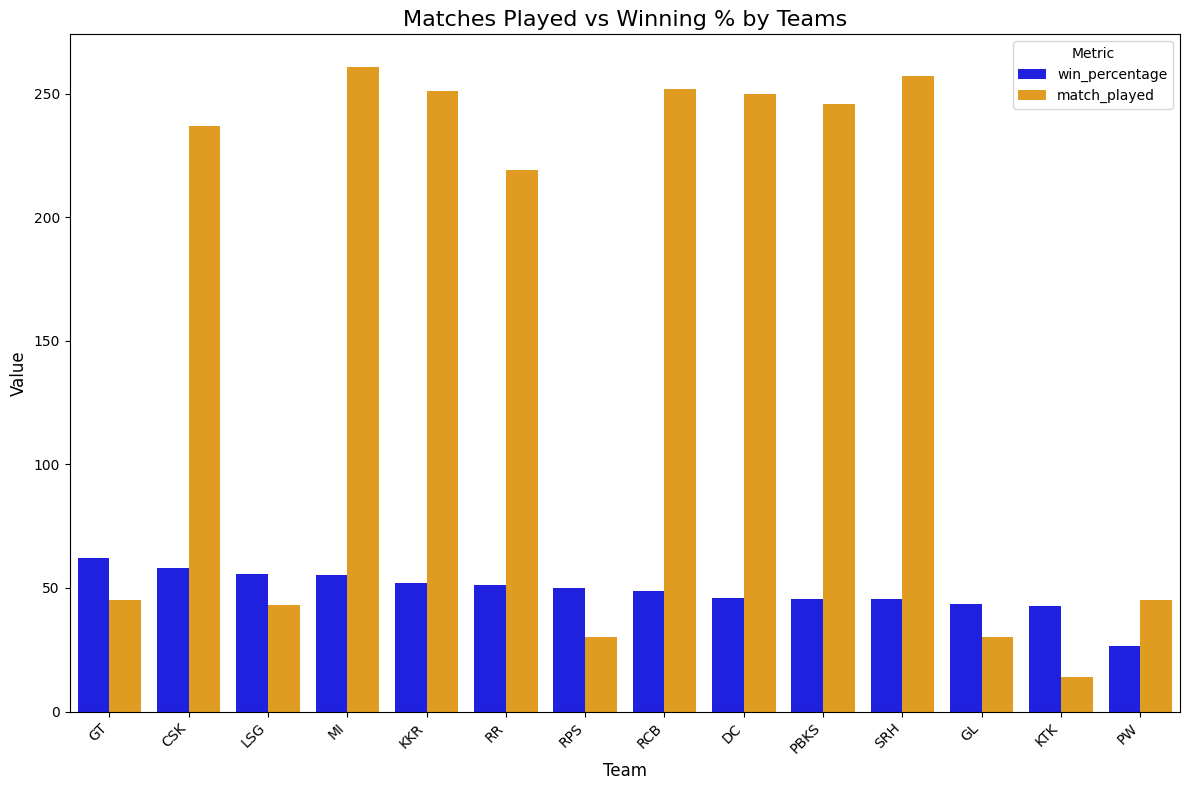

In [125]:
#Team statistics
# Plot Matches Played vs Winning %

# Melt the dataset for grouped bar plotting
team_stats_melted = team_stats.melt(
    id_vars='team_name',
    value_vars=['match_played', 'win_percentage'],
    var_name='Metric',
    value_name='Value'
)

team_stats_melted = team_stats_melted.sort_values(by=['Metric', 'Value'], ascending=[False, False])

# Plot grouped bars for Matches Played and Winning Percentage
plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette=['blue', 'orange'])
plt.title('Matches Played vs Winning % by Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

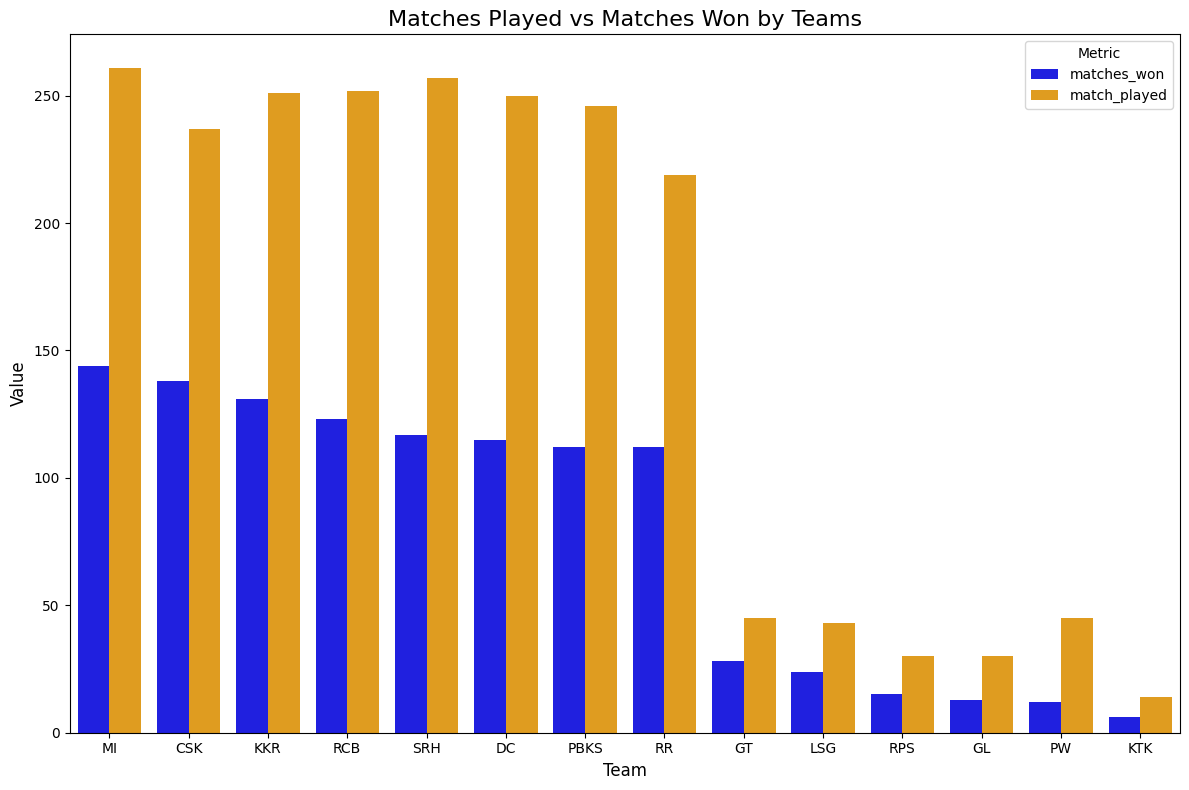

In [126]:
#Matches played vs matches won

# Melt the dataset for grouped bar plotting
team_stats_melted = team_stats.melt(
    id_vars='team_name',
    value_vars=['match_played', 'matches_won'],
    var_name='Metric',
    value_name='Value'
)

team_stats_melted = team_stats_melted.sort_values(by=['Metric', 'Value'], ascending=[False, False])

plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette=['blue', 'orange'])
plt.title('Matches Played vs Matches Won by Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

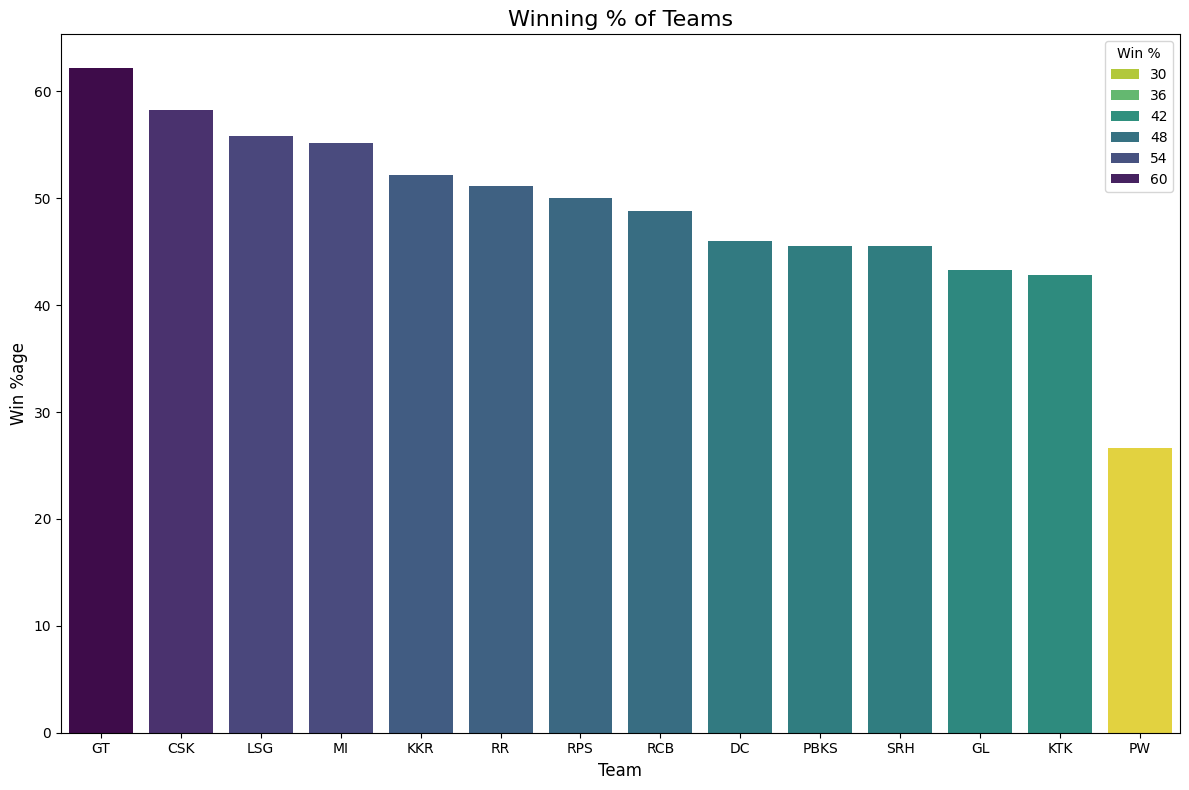

In [127]:
#winning % of teams
team_stats_sorted = team_stats.sort_values(by='win_percentage', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='win_percentage', hue='win_percentage', data=team_stats_sorted, palette="viridis_r")
plt.title('Winning % of Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win %age', fontsize=12)
plt.legend(title='Win %', fontsize=10)
plt.tight_layout()
plt.show()

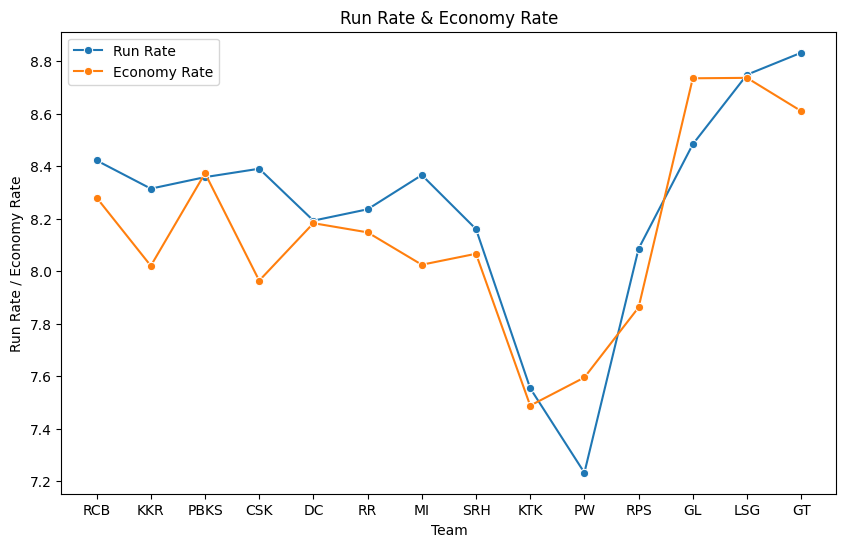

In [128]:
# Plot Run Rate vs Economy Rate
plt.figure(figsize=(10, 6))
sns.lineplot(data=team_stats, x='team_name', y='run_rate', marker='o', label='Run Rate')
sns.lineplot(data=team_stats, x='team_name', y='economy_rate', marker='o', label='Economy Rate')
plt.title('Run Rate & Economy Rate')
plt.xlabel("Team")
plt.ylabel("Run Rate / Economy Rate")
plt.show()

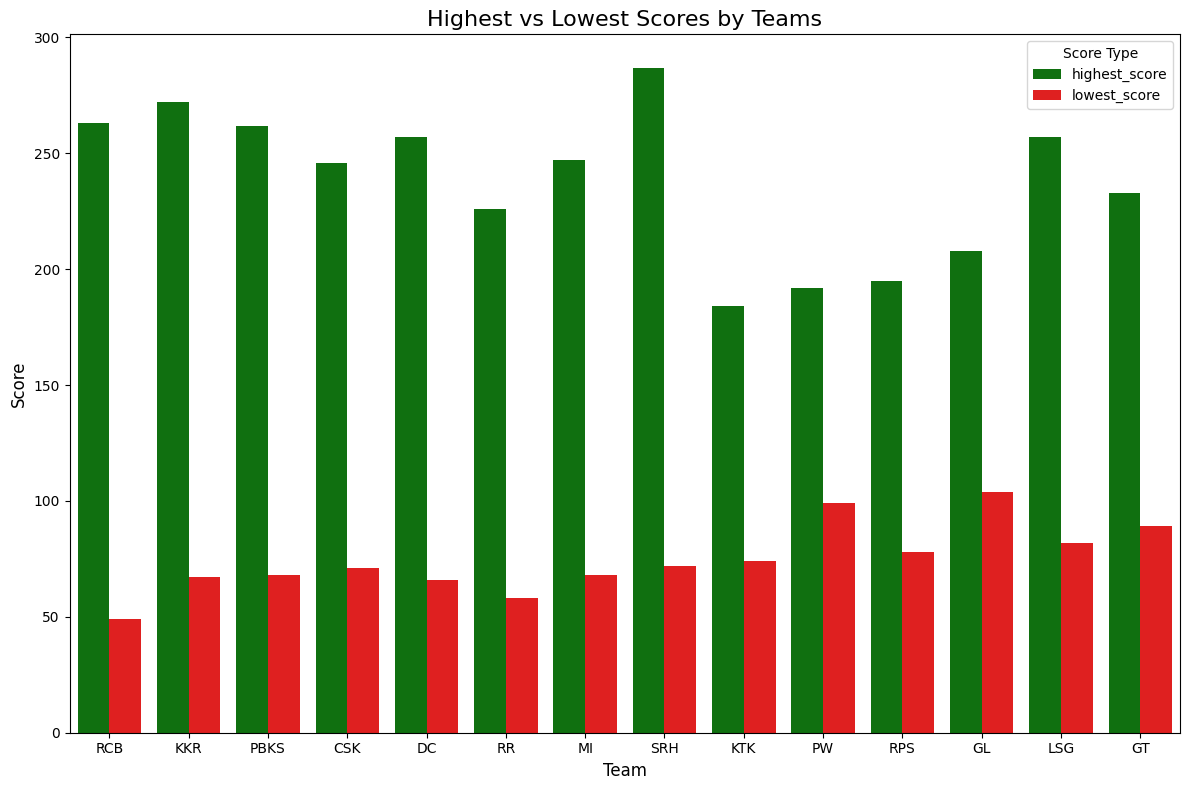

In [129]:
#highest and lowest scores

# Melt the dataset for grouped bar plotting
team_stats_melted = team_stats.melt(
    id_vars='team_name',
    value_vars=['highest_score', 'lowest_score'],
    var_name='Score Type',
    value_name='Score'
)

# Plot grouped bars for highest and lowest scores
plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='Score', hue='Score Type', data=team_stats_melted, palette=['green', 'red'])
plt.title('Highest vs Lowest Scores by Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Score Type', fontsize=10)
plt.tight_layout()
plt.show()

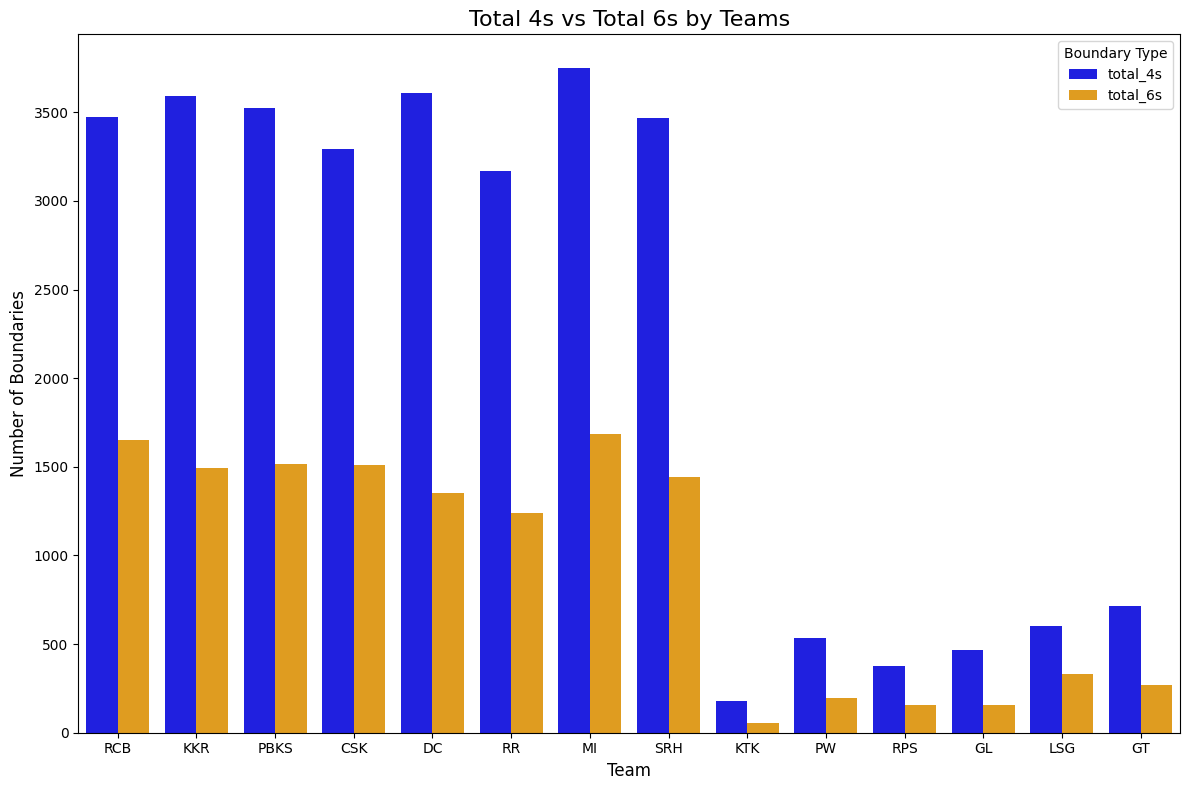

In [130]:
#total 4s and 6s

# Melt the dataset for grouped bar plotting
team_stats_melted = team_stats.melt(id_vars='team_name', value_vars=['total_4s', 'total_6s'],
                                    var_name='Boundary Type', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette=['blue', 'orange'])
plt.title('Total 4s vs Total 6s by Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Boundaries', fontsize=12)
plt.legend(title='Boundary Type', fontsize=10)
plt.tight_layout()
plt.show()


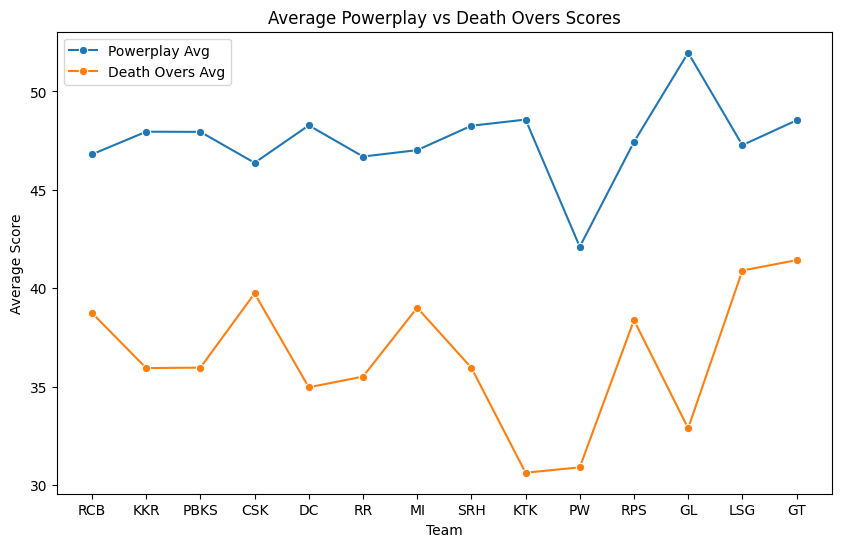

In [131]:
#avg. powerplay and death over scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=team_stats, x='team_name', y='average_powerplay_score', marker='o', label="Powerplay Avg")
sns.lineplot(data=team_stats, x='team_name', y='average_death_score', marker='o', label="Death Overs Avg")
plt.title('Average Powerplay vs Death Overs Scores')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.legend()
plt.show()


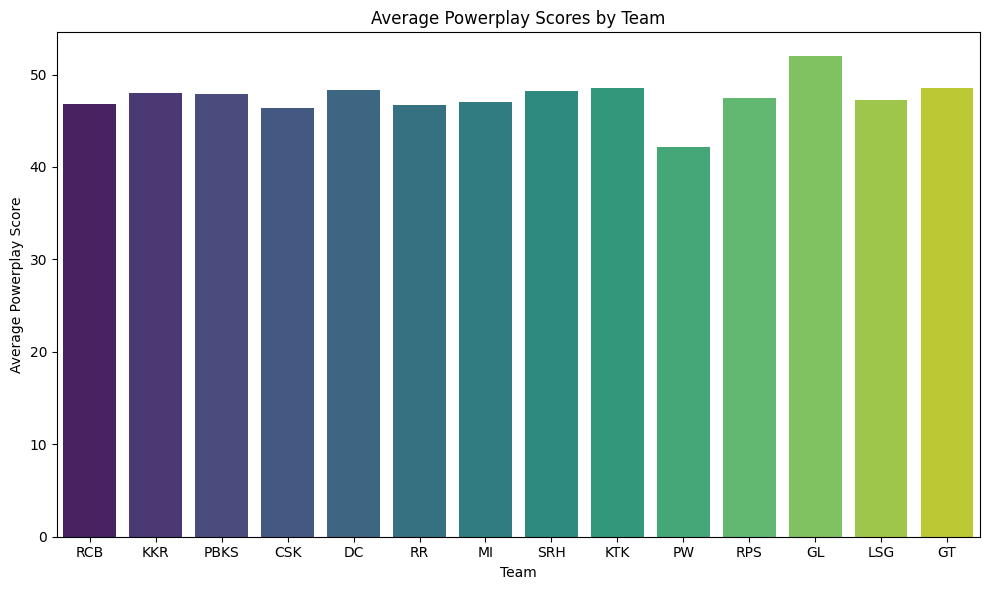

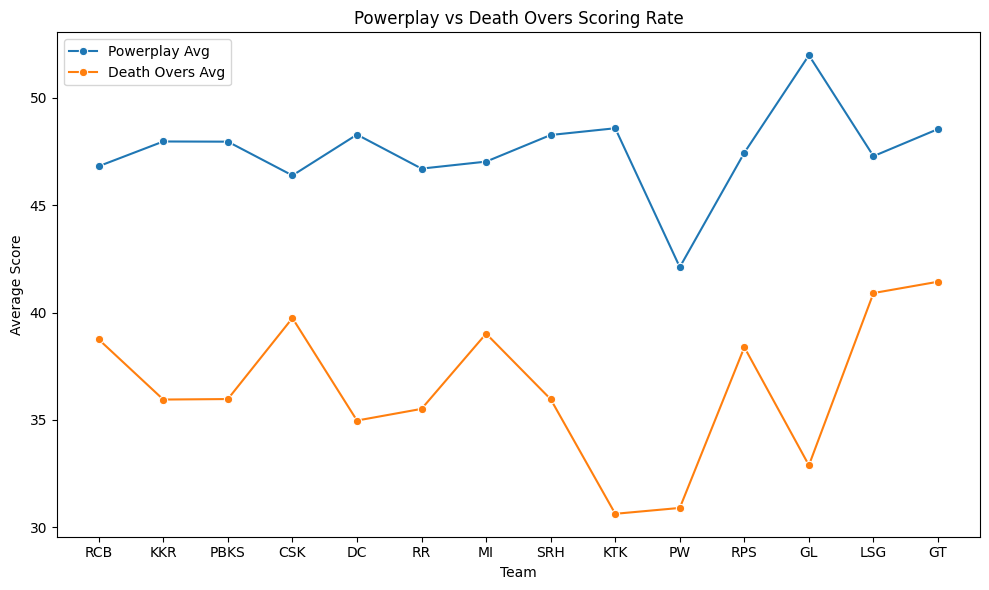

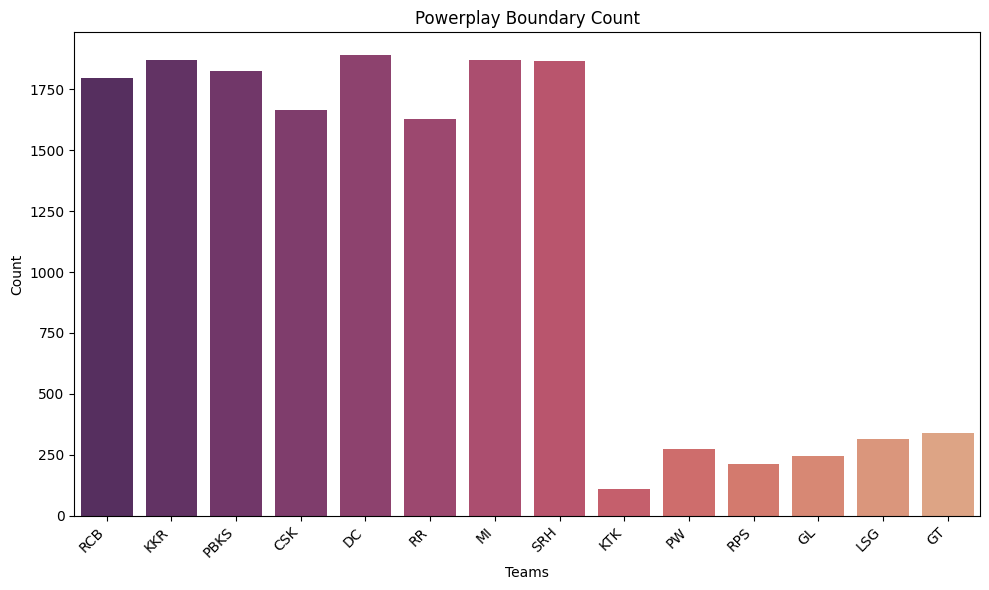

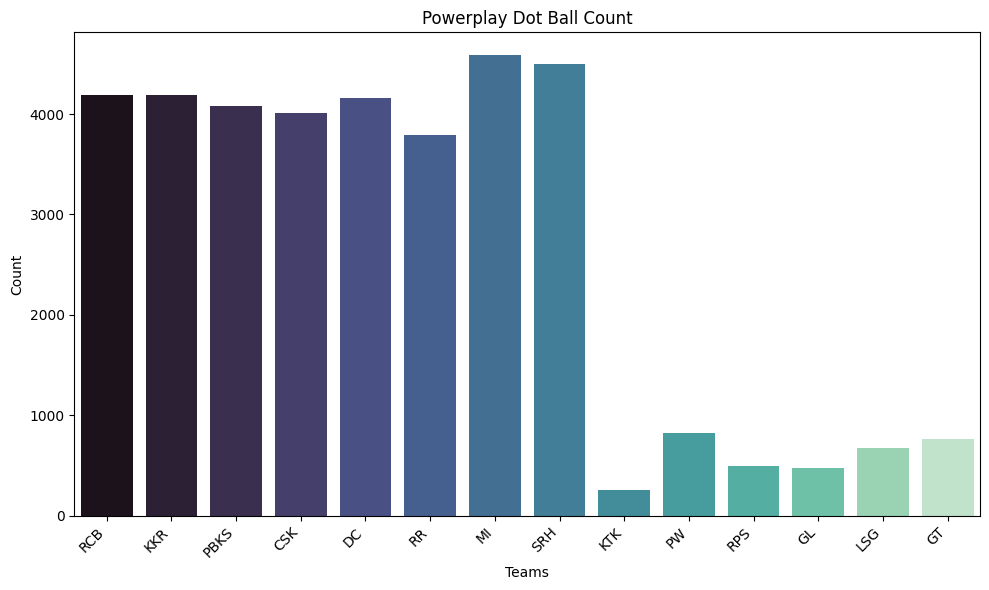

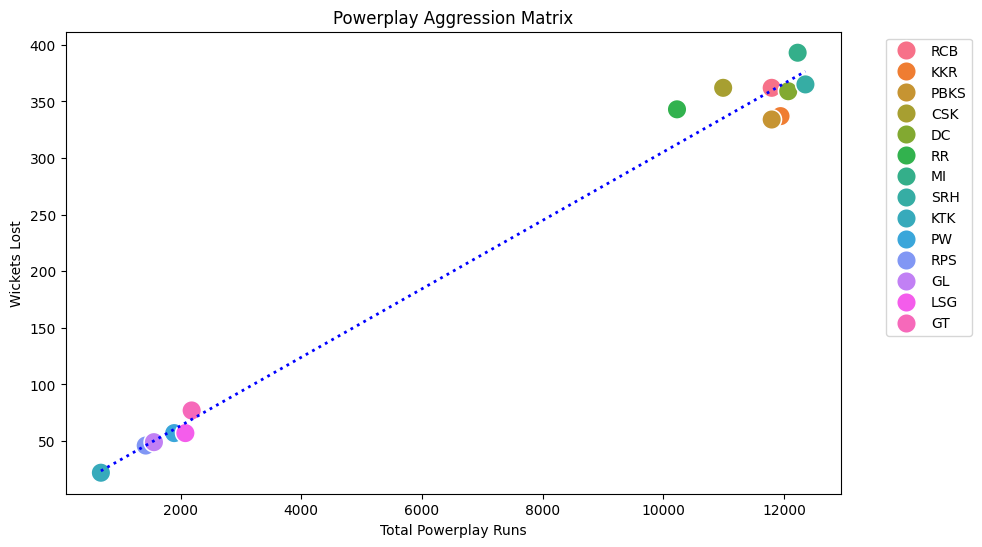

Powerplay Performance Summary:


,average_powerplay_score,powerplay_batting_run,powerplay_wickets,total_4s,total_6s
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,47.515698,7372.642857,225.928571,2196.071429,932.285714
std,2.065675,5192.897540,157.927181,1553.401601,674.922950
min,42.111111,680.000000,22.000000,178.000000,53.000000
25%,46.858974,1941.250000,57.000000,553.250000,214.750000
50%,47.690244,10608.500000,335.500000,3229.500000,1294.500000
75%,48.271453,11904.500000,361.250000,3510.750000,1505.500000
max,51.966667,12354.000000,393.000000,3752.000000,1685.000000


In [147]:
#Powerplay Analysis

# 1. Basic Powerplay Performance Comparison doing with BarPlots

plt.figure(figsize=(10, 6))
sns.barplot(x='team_name', y='average_powerplay_score', hue='team_name', palette='viridis', dodge=False, data=team_stats)
plt.title('Average Powerplay Scores by Team')
plt.xlabel('Team')
plt.ylabel('Average Powerplay Score')
plt.tight_layout()
plt.show()

# 2. Powerplay vs Death Overs Comparison using Line PLot

plt.figure(figsize=(10, 6))
sns.lineplot(data=team_stats, x='team_name', y='average_powerplay_score',
             marker='o', label='Powerplay Avg')
sns.lineplot(data=team_stats, x='team_name', y='average_death_score',
             marker='o', label='Death Overs Avg')
plt.title('Powerplay vs Death Overs Scoring Rate')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.legend()
plt.tight_layout()
plt.show()


# 3. Powerplay Boundary Analysis

plt.figure(figsize=(10, 6))
# team_stats.set_index('team_name')["powerplay_boundary_count"].plot(kind='bar', color=)
sns.barplot(x='team_name', y='powerplay_boundary_count', hue = "team_name", legend = False, data=team_stats, palette="flare_r")
plt.title('Powerplay Boundary Count')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Powerplay Dot Ball Analysis

plt.figure(figsize=(10, 6))
sns.barplot(x='team_name', y='powerplay_dot_count', hue = "team_name", legend = False, data=team_stats, palette="mako")
plt.title('Powerplay Dot Ball Count')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Powerplay Aggression Matrix (Runs vs Wickets)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_stats, x='powerplay_batting_run',
                y='powerplay_wickets', hue='team_name',
                s=200)

# Add dotted regression line
sns.regplot(
    data=team_stats,
    x='powerplay_batting_run',
    y='powerplay_wickets',
    scatter=False,  # Do not show scatter points again
    color='blue',
    ci=None,  # Disable confidence interval shading
    line_kws={"linestyle": "dotted", "linewidth": 2}  # Customize line style and width
)

plt.title('Powerplay Aggression Matrix')
plt.xlabel('Total Powerplay Runs')
plt.ylabel('Wickets Lost')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


# 6. Powerplay Summary Statistics

powerplay_stats = team_stats[[
    'team_name',
    'average_powerplay_score',
    'powerplay_batting_run',
    'powerplay_wickets',
    'total_4s',
    'total_6s'
]].set_index('team_name')

print("Powerplay Performance Summary:")
display(powerplay_stats.describe())

2) Player Analysis

Top 20 Run-Scorers:
              player  total_run_bat
15          V Kohli           8014
59         S Dhawan           6769
78        RG Sharma           6630
200       DA Warner           6567
28         SK Raina           5536
27         MS Dhoni           5243
127  AB de Villiers           5181
174        CH Gayle           4997
63       RV Uthappa           4954
108      KD Karthik           4843
381        KL Rahul           4689
104       AM Rahane           4642
323    F du Plessis           4571
379       SV Samson           4419
226       AT Rayudu           4348
56        G Gambhir           4217
45        SR Watson           3880
115       MK Pandey           3859
329        SA Yadav           3594
435      JC Buttler           3583


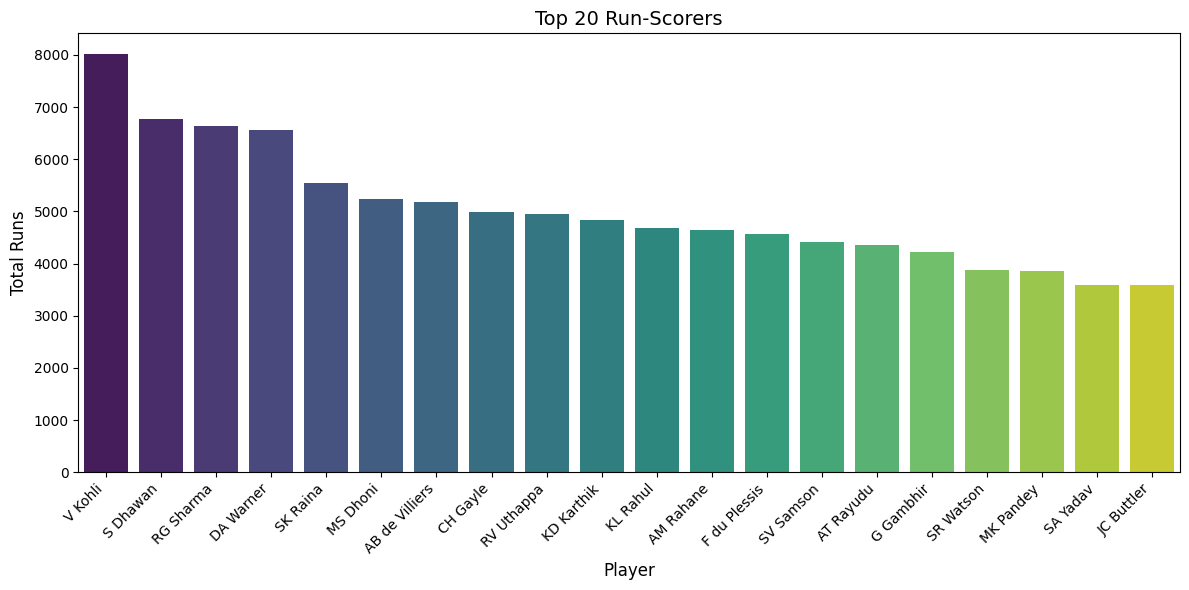

In [133]:
#Player Analysis
#top 20 run-scorers
top_20 = player_stats.nlargest(20, 'total_run_bat')
print("Top 20 Run-Scorers:\n", top_20[['player', 'total_run_bat']])

#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='player', y='total_run_bat', data=top_20,
            hue='player', legend=False, palette='viridis')

plt.title('Top 20 Run-Scorers', fontsize=14)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


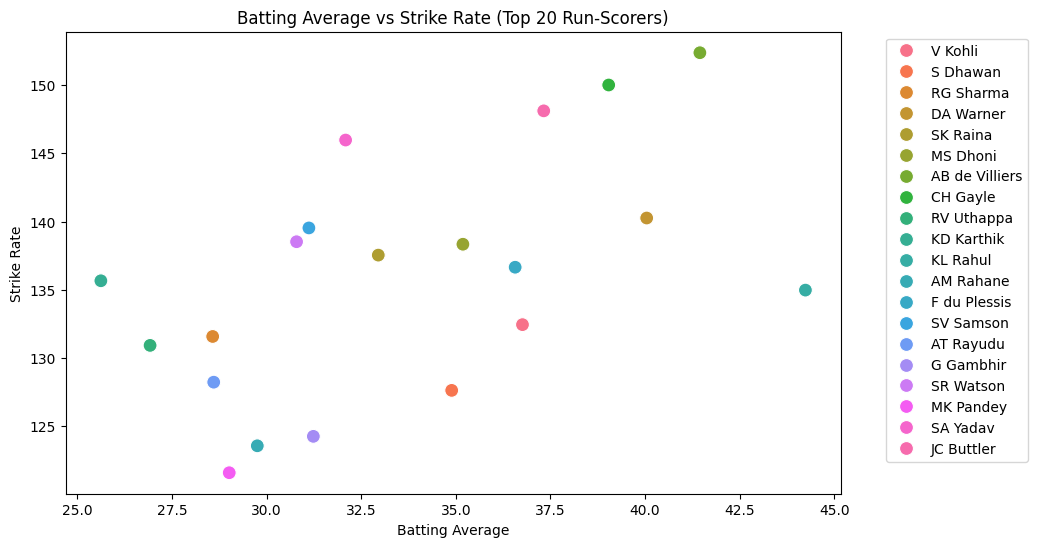

In [134]:
#batting avg. vs strike rate for top 20 run-scorers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20, x='batting_average', y='strike_rate', hue='player', s=100)
plt.title("Batting Average vs Strike Rate (Top 20 Run-Scorers)")
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Highest Batting Average: player               KL Rahul
match_count               122
total_run_bat            4689
balls_faced              3474
total_wicket                0
total_run_bowl              0
balling_over              0.0
6_count                   187
4_count                   400
2_count                   244
1_count                  1464
batting_average     44.235849
strike_rate        134.974093
bowling_economy           0.0
highest_run               132
MOTM_count                 13
Name: 381, dtype: object

Highest Strike Rate: player             AD Russell
match_count               104
total_run_bat            2488
balls_faced              1407
total_wicket              125
total_run_bowl           2691
balling_over            282.5
6_count                   209
4_count                   171
2_count                    60
1_count                   430
batting_average     29.619048
strike_rate        176.830135
bowling_economy      9.525664
highest_run                8

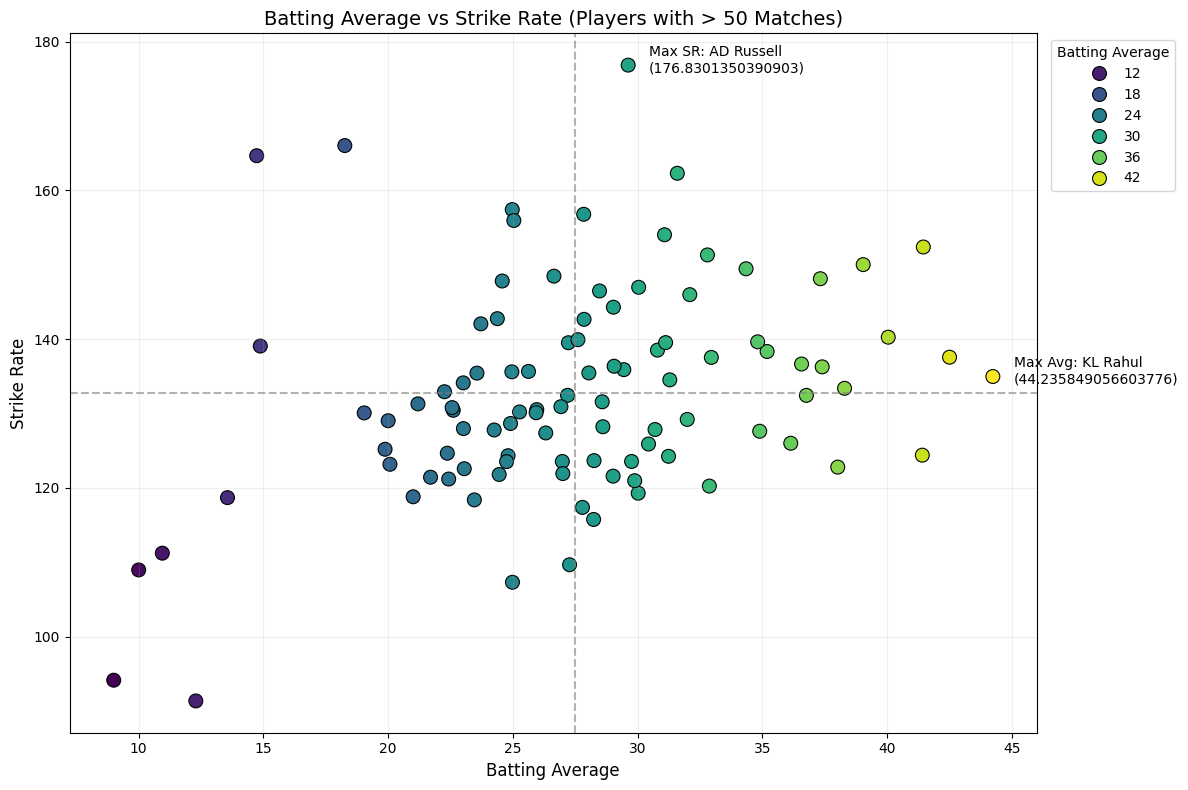

In [135]:
#highest avg. & strike rate for players with >50 matches
filtered_players = player_stats[player_stats['match_count'] > 50]
highest_avg = filtered_players.loc[filtered_players['batting_average'].idxmax()]
highest_sr = filtered_players.loc[filtered_players['strike_rate'].idxmax()]
print("Highest Batting Average:", highest_avg)
print()
print("Highest Strike Rate:", highest_sr)

# Create plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=filtered_players,
    x='batting_average',
    y='strike_rate',
    hue='batting_average',
    palette='viridis',
    s=100,
    edgecolor='black'
)

# Highlight top performers
max_avg_player = filtered_players.loc[filtered_players['batting_average'].idxmax()]
max_sr_player = filtered_players.loc[filtered_players['strike_rate'].idxmax()]

# Annotate points
scatter.annotate(f"Max Avg: {max_avg_player['player']}\n({max_avg_player['batting_average']})",
                 (max_avg_player['batting_average'], max_avg_player['strike_rate']),
                 textcoords="offset points", xytext=(15,-5), ha='left')

scatter.annotate(f"Max SR: {max_sr_player['player']}\n({max_sr_player['strike_rate']})",
                 (max_sr_player['batting_average'], max_sr_player['strike_rate']),
                 textcoords="offset points", xytext=(15,-5), ha='left')


# Add reference lines
plt.axvline(filtered_players['batting_average'].mean(), color='grey', linestyle='--', alpha=0.6)
plt.axhline(filtered_players['strike_rate'].mean(), color='grey', linestyle='--', alpha=0.6)

plt.title('Batting Average vs Strike Rate (Players with > 50 Matches)', fontsize=14)
plt.xlabel('Batting Average', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.legend(title='Batting Average', bbox_to_anchor=(1.15, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

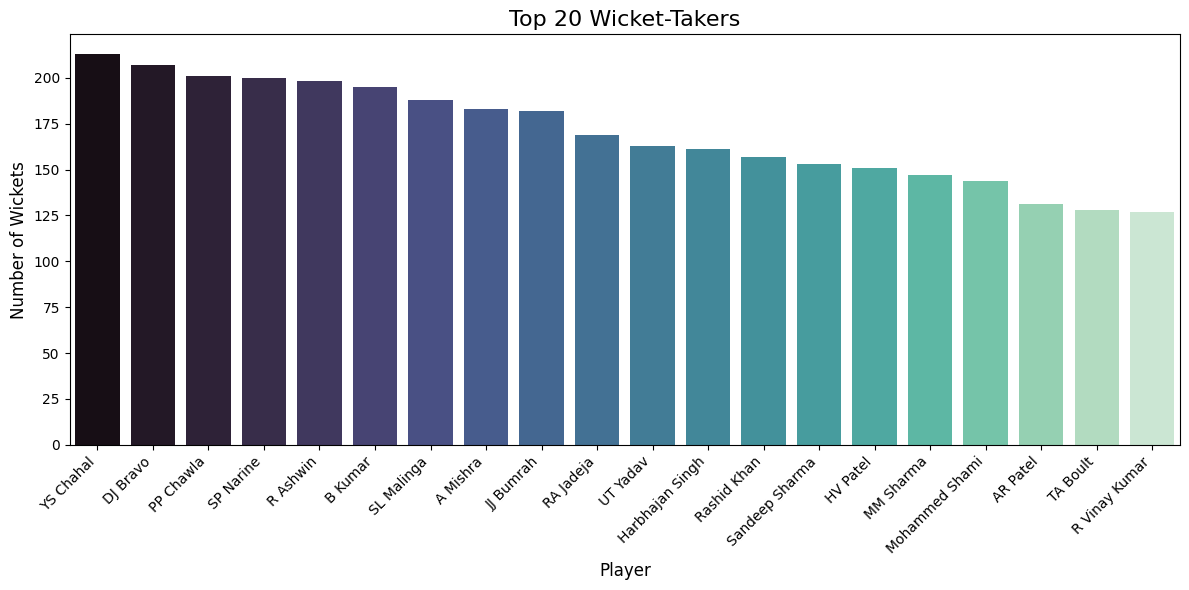

In [136]:
#top wicket-takers
top_wicket_takers = player_stats.nlargest(20, 'total_wicket')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_wicket_takers, x="player", y="total_wicket",
            hue="player", palette="mako", legend=False)
plt.title("Top 20 Wicket-Takers", fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Wickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

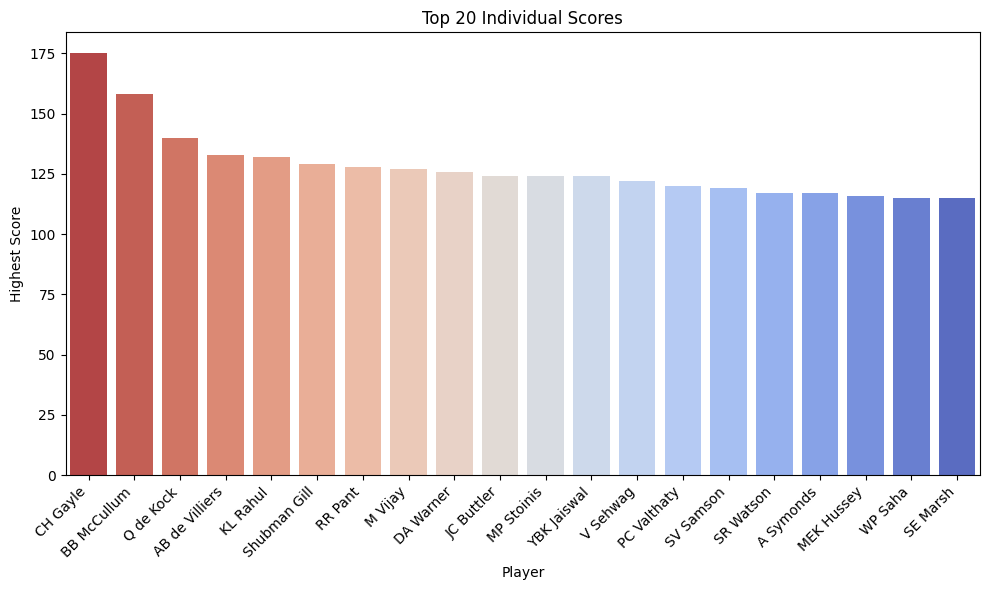

In [137]:
#top highest individual scores
top_individual_scores = player_stats.nlargest(20, 'highest_run')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_individual_scores, x="player", y="highest_run", hue="player", palette="coolwarm_r", legend=False)
plt.title("Top 20 Individual Scores")
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


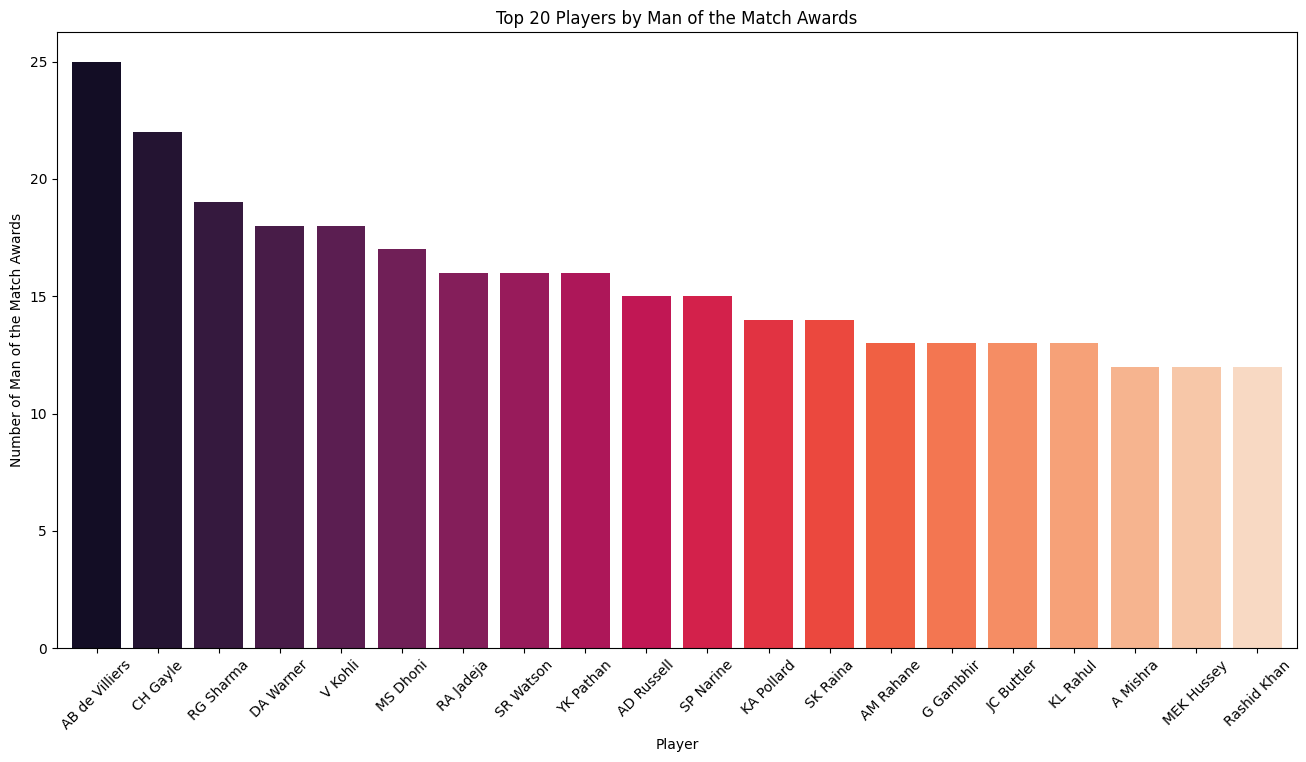

In [138]:
#man of the match count
motm_counts = player_stats.groupby('player')['MOTM_count'].sum().nlargest(20)

motm_counts.plot(kind="bar", width = 0.8, figsize=(16, 8), color=sns.color_palette("rocket", len(motm_counts)))
plt.title("Top 20 Players by Man of the Match Awards")
plt.xlabel('Player')
plt.ylabel('Number of Man of the Match Awards')
plt.xticks(rotation=45)
plt.show()

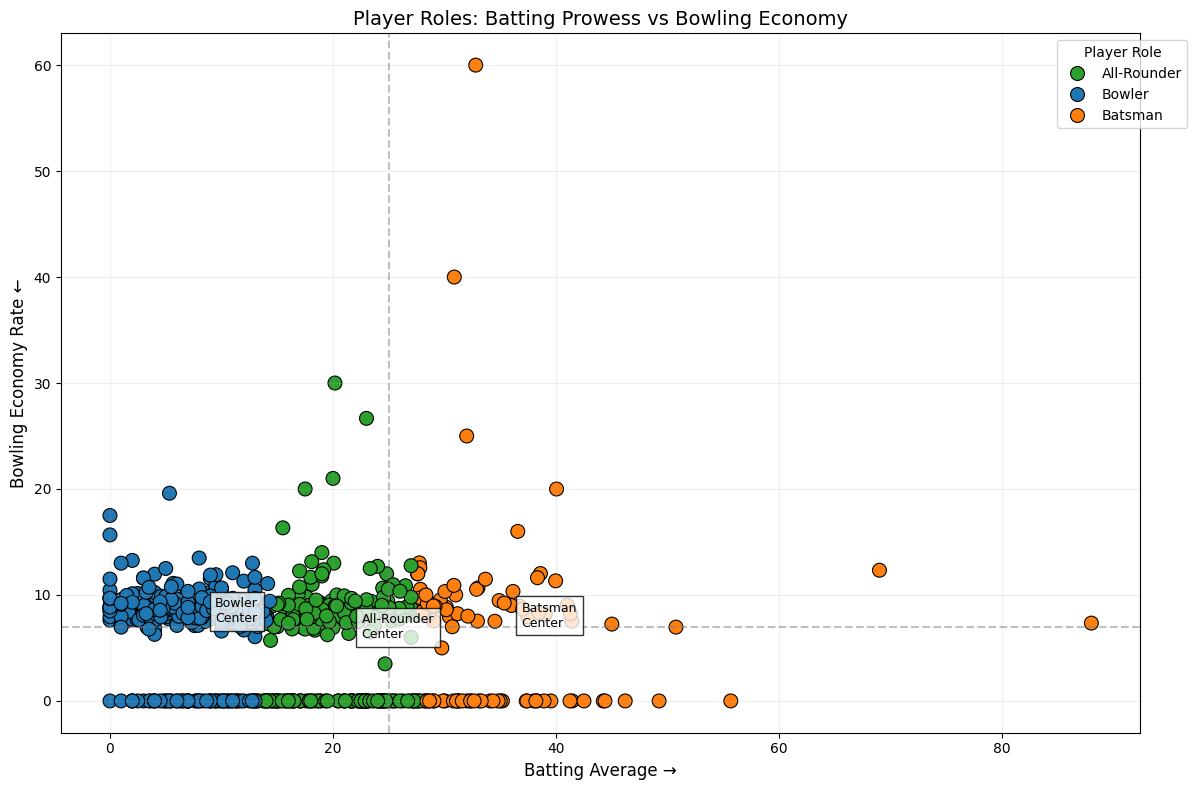

In [139]:
#K-Means Clustering to plot Batting Average vs Bowling Economy Rate for number of clusters = 3 (Batsman, Bowler, All Rounder)
# Prepare data for clustering
# Prepare data (players with both batting and bowling stats)
clustering_data = player_stats[['batting_average', 'bowling_economy']].dropna()

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)
clustering_data['cluster'] = clusters

# Get cluster centers and sort them strategically
centroids = kmeans.cluster_centers_
sorted_indices = centroids[:,0].argsort()  # Sort by batting average

# Define role labels based on cluster characteristics
role_mapping = {
    sorted_indices[0]: 'Bowler',        # Lowest batting average
    sorted_indices[1]: 'All-Rounder',   # Medium batting average
    sorted_indices[2]: 'Batsman'        # Highest batting average
}

# Apply role labels
clustering_data['role'] = clustering_data['cluster'].map(role_mapping)

# Create visualization
plt.figure(figsize=(12, 8))
sc = sns.scatterplot(
    data=clustering_data,
    x='batting_average',
    y='bowling_economy',
    hue='role',
    palette={'Batsman': '#ff7f0e', 'Bowler': '#1f77b4', 'All-Rounder': '#2ca02c'},
    s=100,
    edgecolor='black'
)

# Add cluster centroids
for idx, (x, y) in enumerate(centroids):
    role = role_mapping[idx]
    sc.text(x+2, y+0.1, f'{role}\nCenter', ha='left', va='bottom',
            fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

# Reference lines (cricket-specific thresholds)
plt.axvline(25, color='gray', linestyle='--', alpha=0.5)  # Batting average threshold
plt.axhline(7.0, color='gray', linestyle='--', alpha=0.5)  # Economy rate threshold

plt.title('Player Roles: Batting Prowess vs Bowling Economy', fontsize=14)
plt.xlabel('Batting Average →', fontsize=12)
plt.ylabel('Bowling Economy Rate ←', fontsize=12)
plt.legend(title='Player Role', bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

Top Six Scorers:
              player  6_count
174        CH Gayle      359
78        RG Sharma      281
15          V Kohli      273
127  AB de Villiers      253
27         MS Dhoni      252
200       DA Warner      236
239      KA Pollard      224
342      AD Russell      209
379       SV Samson      206
28         SK Raina      204

Top Four Scorers:
            player  4_count
59       S Dhawan      768
15        V Kohli      708
200     DA Warner      663
78      RG Sharma      599
28       SK Raina      506
56      G Gambhir      492
63     RV Uthappa      481
104     AM Rahane      479
108    KD Karthik      466
323  F du Plessis      422

Top Double Runners:
              player  2_count
15          V Kohli      445
200       DA Warner      370
27         MS Dhoni      340
59         S Dhawan      299
28         SK Raina      271
127  AB de Villiers      268
78        RG Sharma      263
108      KD Karthik      258
104       AM Rahane      257
56        G Gambhir      249

Top 

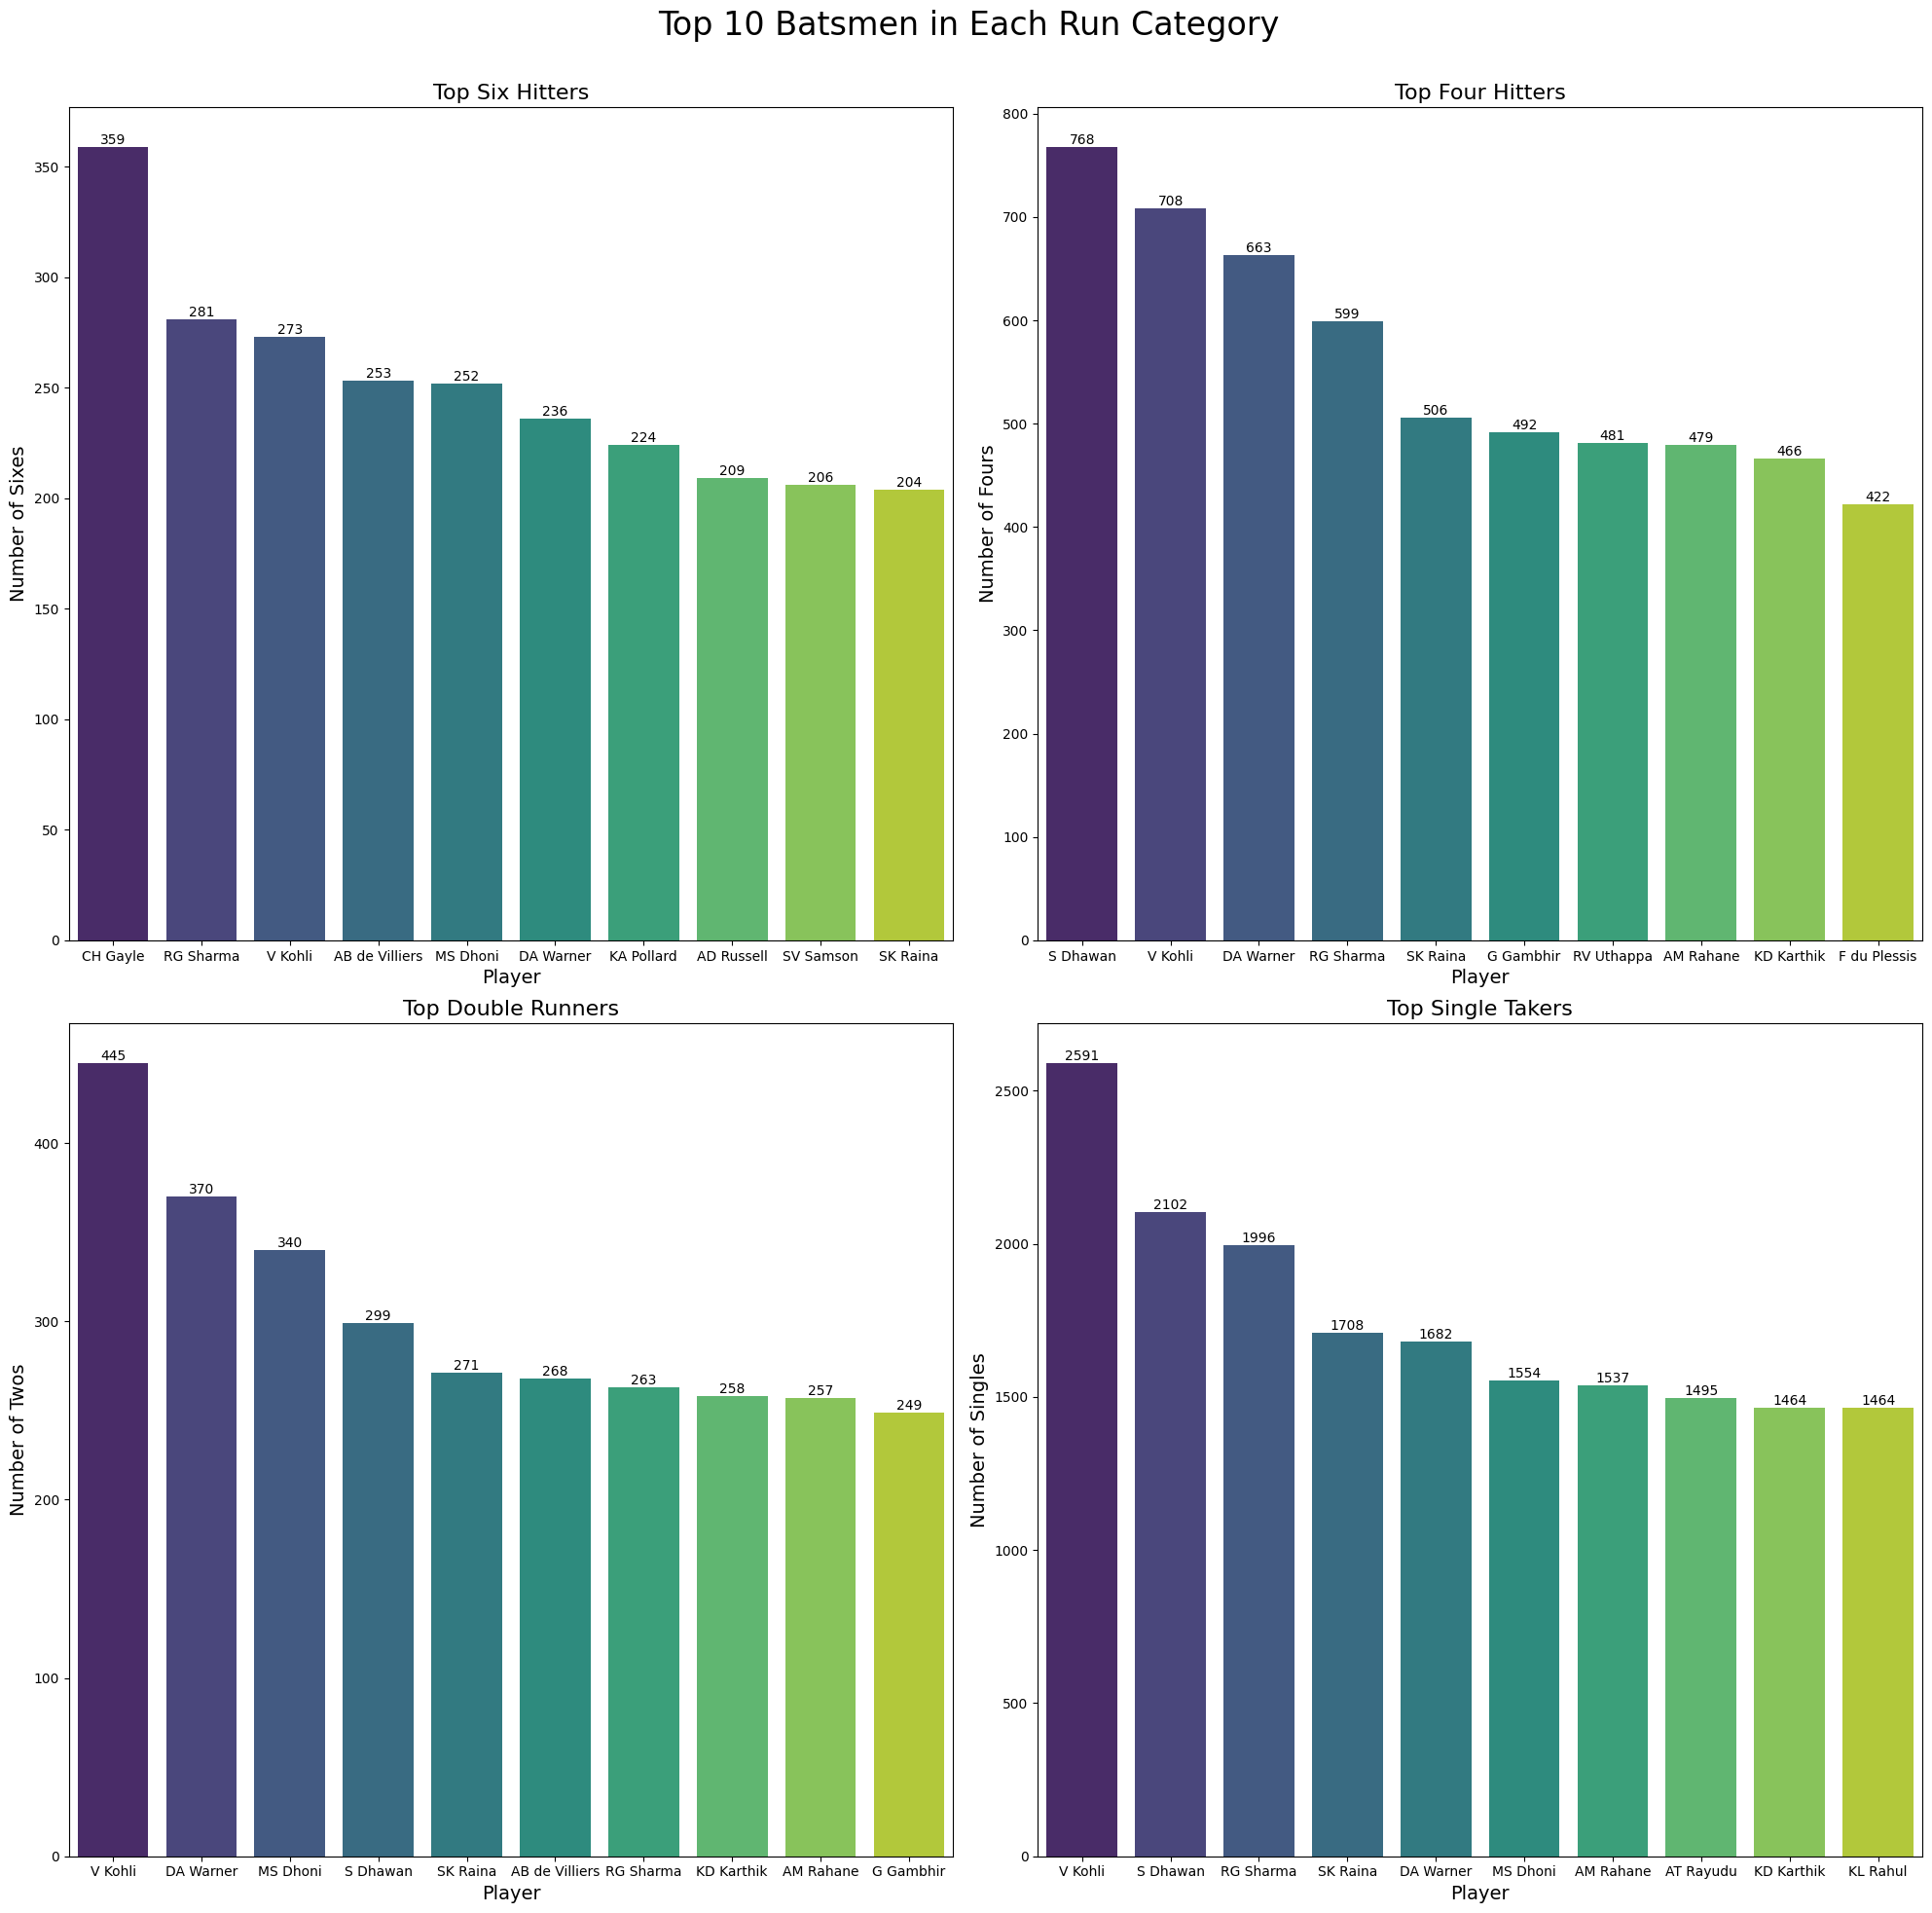

In [148]:
# Top 10 Batsmen in each run category
top_6_scorers = player_stats.nlargest(10, '6_count')[['player', '6_count']]
top_4_scorers = player_stats.nlargest(10, '4_count')[['player', '4_count']]
top_2_scorers = player_stats.nlargest(10, '2_count')[['player', '2_count']]
top_1_scorers = player_stats.nlargest(10, '1_count')[['player', '1_count']]

print("Top Six Scorers:\n", top_6_scorers)
print("\nTop Four Scorers:\n", top_4_scorers)
print("\nTop Double Runners:\n", top_2_scorers)
print("\nTop Single Scorers:\n", top_1_scorers)

# Set up the 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Top 10 Batsmen in Each Run Category', fontsize=24)

# Define data and titles for each subplot
plot_data = [
    (top_6_scorers, '6_count', 'Top Six Hitters', 'Number of Sixes'),
    (top_4_scorers, '4_count', 'Top Four Hitters', 'Number of Fours'),
    (top_2_scorers, '2_count', 'Top Double Runners', 'Number of Twos'),
    (top_1_scorers, '1_count', 'Top Single Takers', 'Number of Singles')
]

# Create each subplot
for idx, (data, count_col, title, ylabel) in enumerate(plot_data):
    row = idx // 2
    col = idx % 2
    ax = axs[row, col]

    sns.barplot(x='player', y=count_col, data=data, ax=ax, hue='player', palette='viridis', legend=False)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Player', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    # Add value labels on top of each bar
    for i, v in enumerate(data[count_col]):
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust to make room for the main title
plt.show()

3) Seasonal Analysis

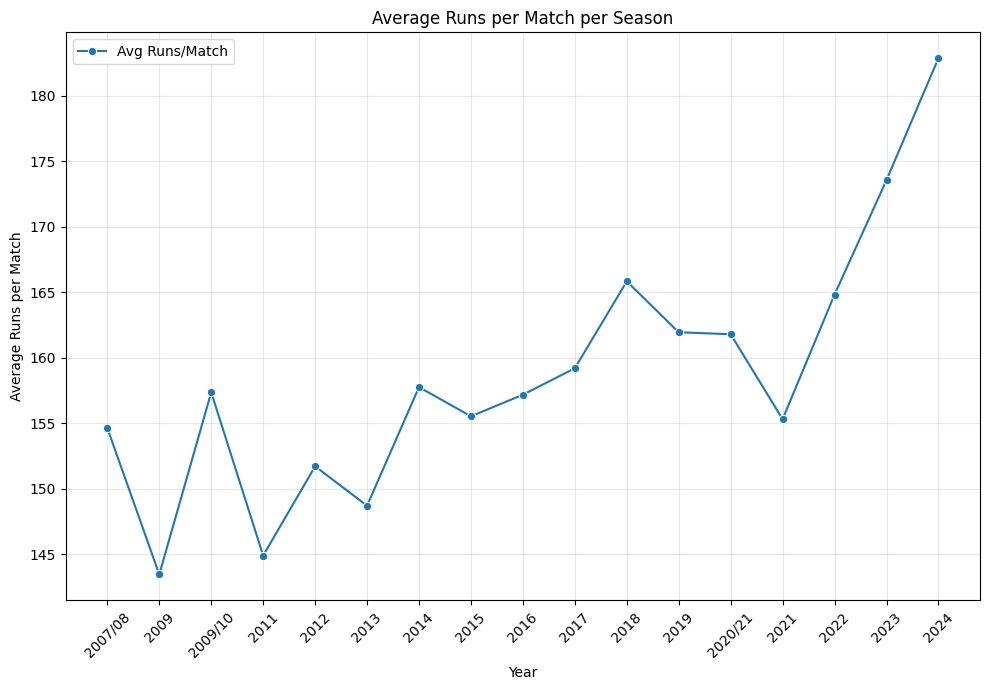

In [141]:
#Seasonal analysis
#average runs per match per season
plt.figure(figsize=(10, 7))
sns.lineplot(data=seasonal_stats, x='Year', y='average_run_per_match', marker='o', label='Avg Runs/Match')
plt.title('Average Runs per Match per Season')
plt.xlabel('Year')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

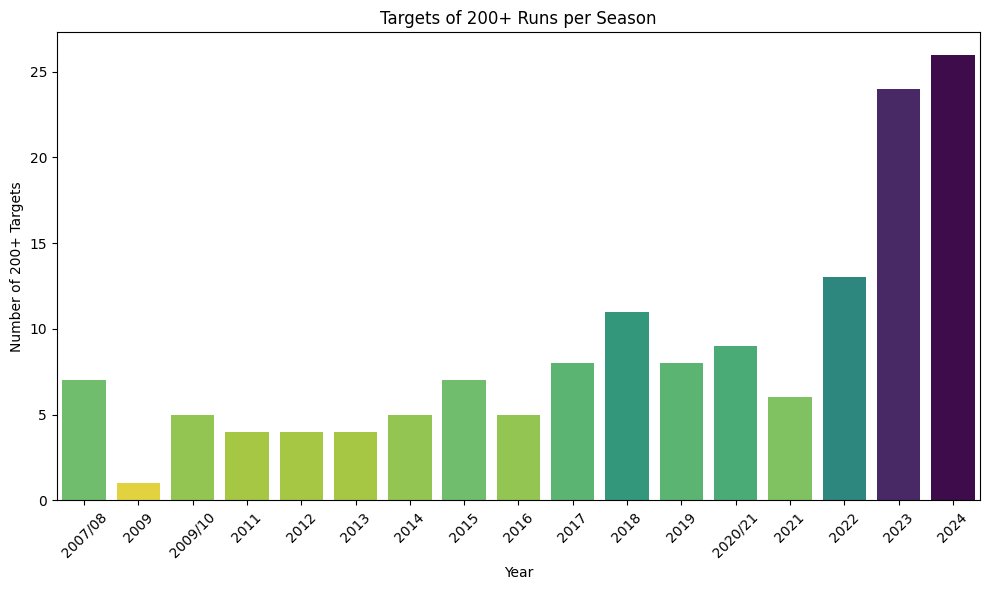

In [142]:
#Targets of 200+ Runs per Season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_stats, x='Year', y='targets_200+', palette='viridis_r', hue = "targets_200+", legend = False)
plt.title('Targets of 200+ Runs per Season')
plt.xlabel('Year')
plt.ylabel('Number of 200+ Targets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

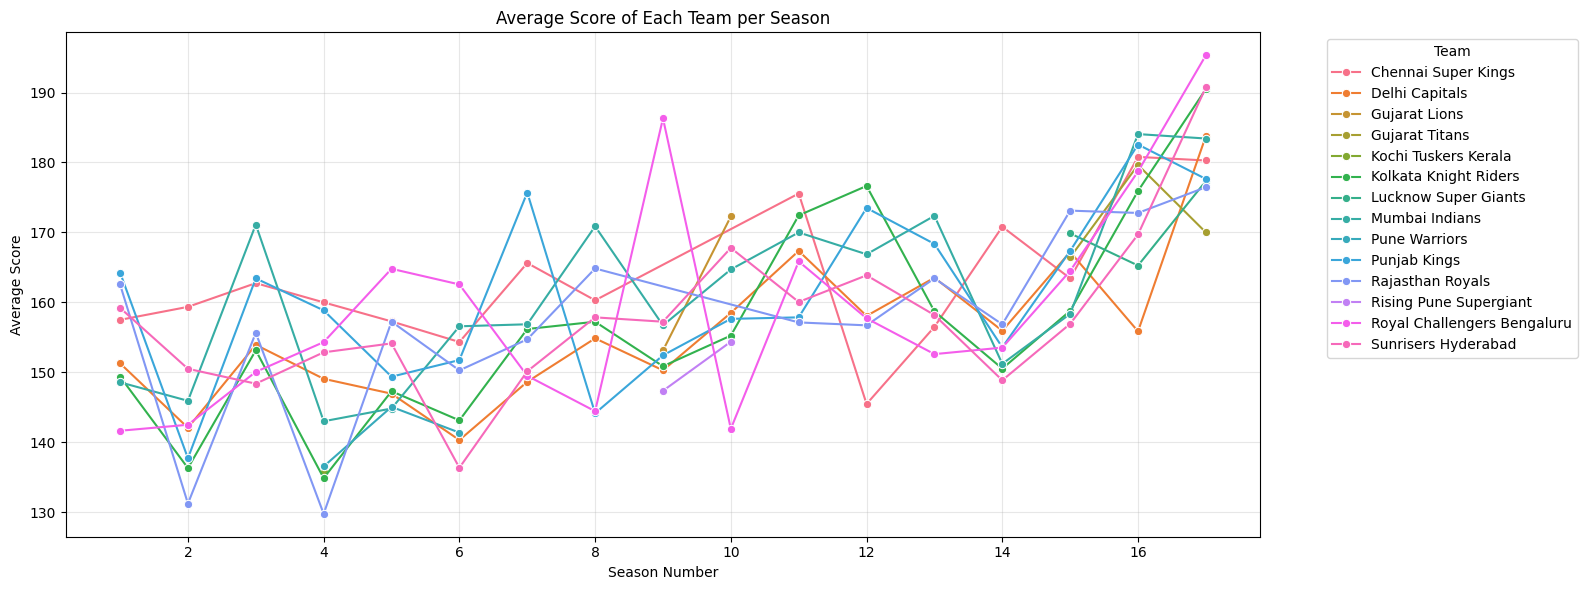

In [143]:
#Average Score of Each Team per Season
plt.figure(figsize=(16, 6))
sns.lineplot(data=team_season_stats, x='season_no', y='average_score', hue='team_name', marker='o')
plt.title('Average Score of Each Team per Season')
plt.xlabel('Season Number')
plt.ylabel('Average Score')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

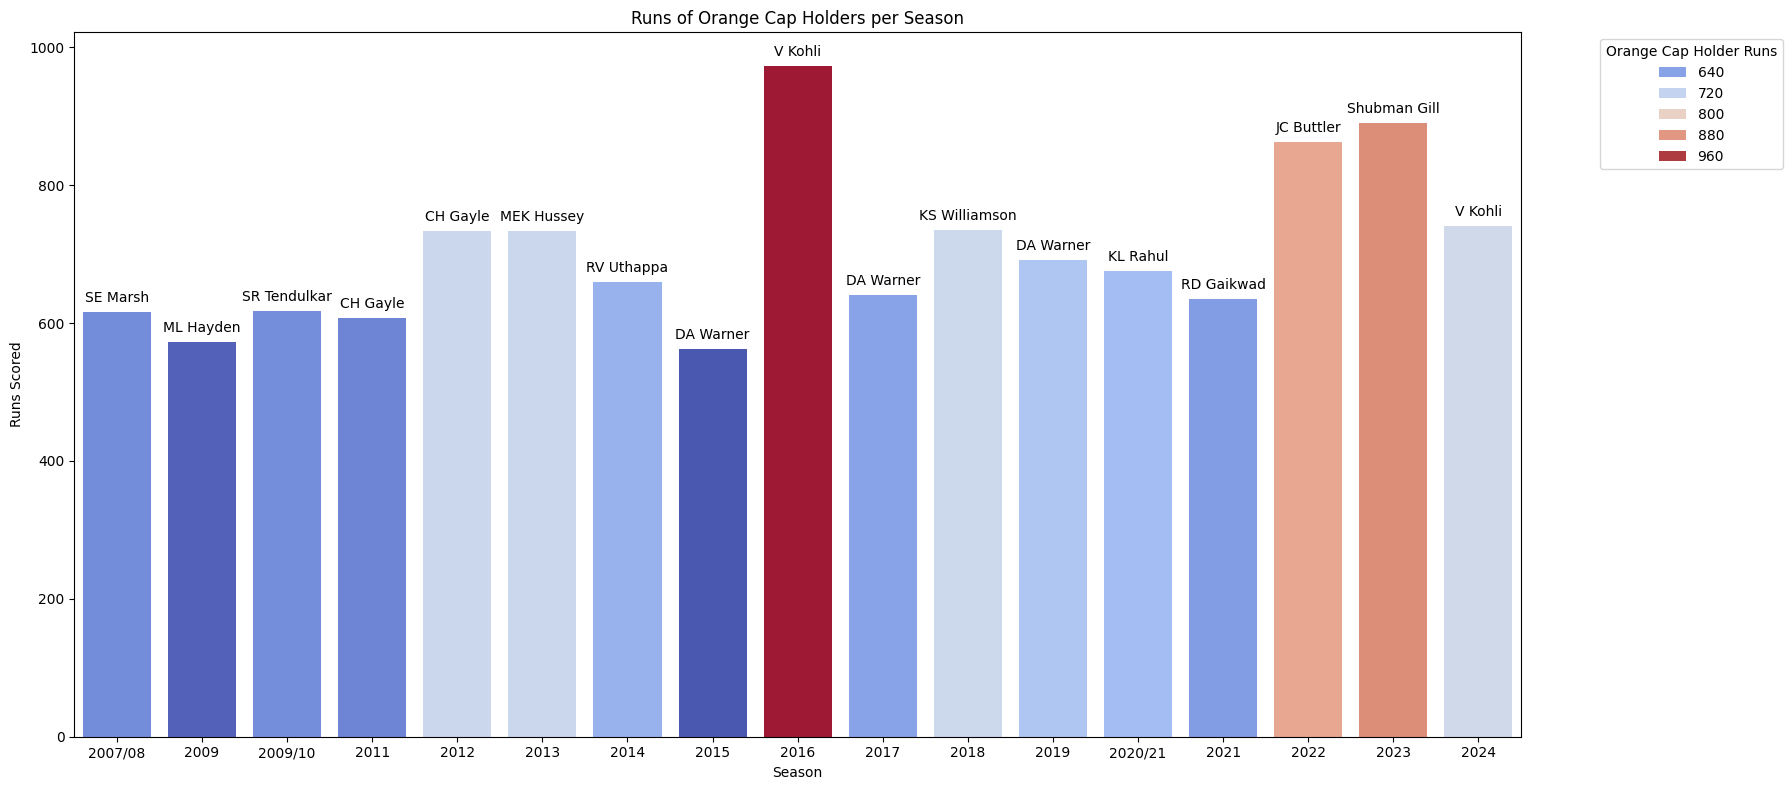

In [144]:
#Runs of Orange Cap Holders per Season
plt.figure(figsize=(18, 8))
sns.barplot(data=seasonal_stats, x='Year', y='orange_cap_run', hue='orange_cap_run', palette='coolwarm', legend = "auto")

# player names on top of each bar
for index, row in seasonal_stats.iterrows():
    plt.text(
        x=index,  # X-coordinate (bar position)
        y=row['orange_cap_run'] + 10,  # Y-coordinate (slightly above the bar)
        s=row['orange_cap_holder'],  # Text to display (player name)
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Runs of Orange Cap Holders per Season')
plt.xlabel('Season')
plt.ylabel('Runs Scored')
plt.legend(title='Orange Cap Holder Runs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


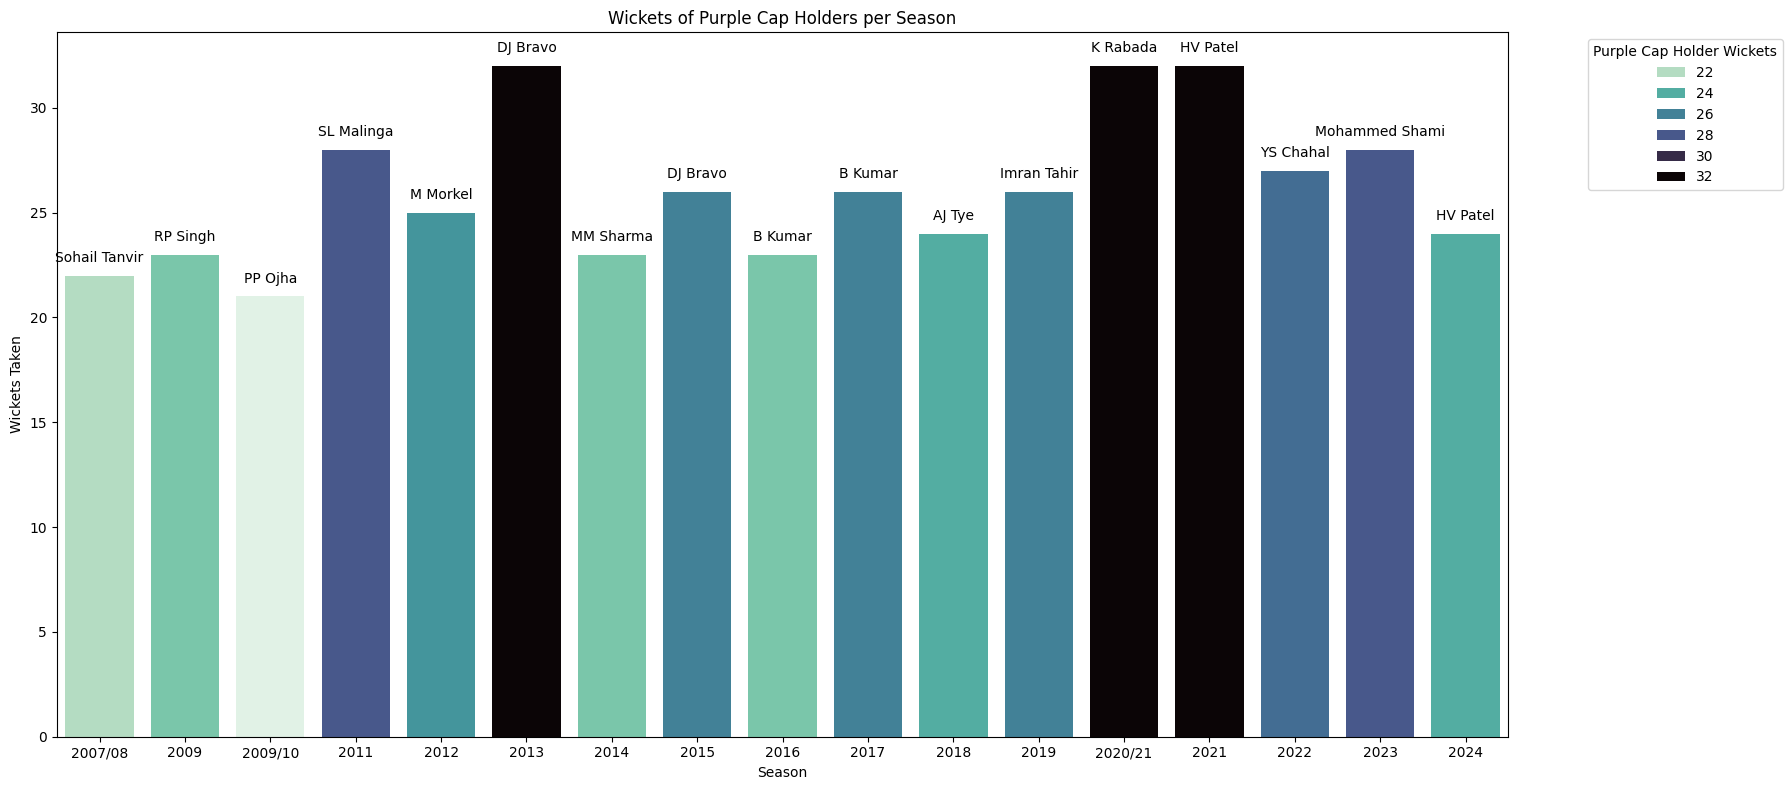

In [145]:
#Track wickets of Purple Cap Holders per season
plt.figure(figsize=(18, 8))
sns.barplot(data=seasonal_stats, x='Year', y='purple_cap_wicket', hue='purple_cap_wicket', palette='mako_r', legend="auto")

#player name on top of each bar
for index, row in seasonal_stats.iterrows():
    plt.text(
        x=index,  # X-coordinate (bar position)
        y=row['purple_cap_wicket'] + 0.5,  # Y-coordinate (slightly above the bar)
        s=row['purple_cap_holder'],  # Text to display (player name)
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Wickets of Purple Cap Holders per Season')
plt.xlabel('Season')
plt.ylabel('Wickets Taken')
plt.legend(title='Purple Cap Holder Wickets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-157-aab2231242a7>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bowlers_per_season = top_bowlers_stats.groupby('season_no', group_keys=False, as_index=False).apply(lambda x: x.nlargest(10, 'wickets')).reset_index(drop=True)


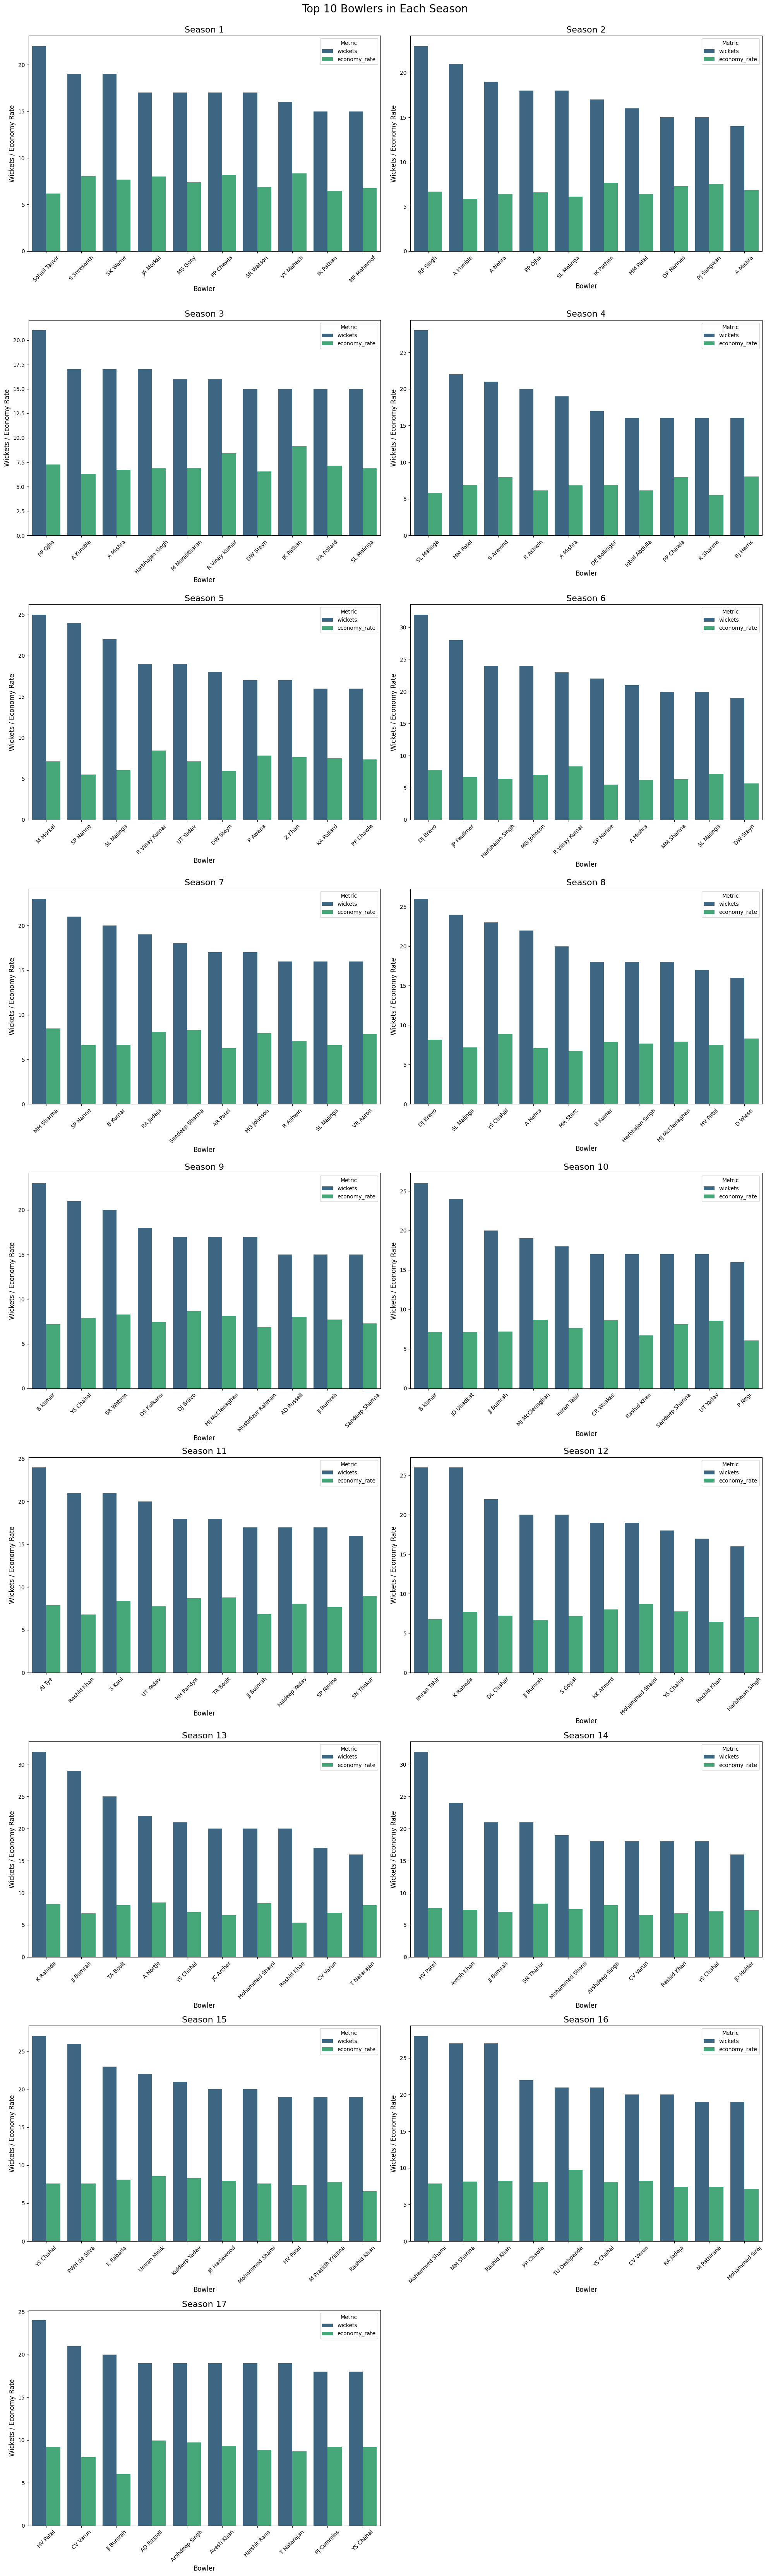

In [157]:
#Top 10 bowlers per season

# Normalize wickets and economy rate per season
top_bowlers_stats['normalized_wickets'] = top_bowlers_stats.groupby('season_no')['wickets'].transform(lambda x: x / x.max())
top_bowlers_stats['normalized_economy_rate'] = top_bowlers_stats.groupby('season_no')['economy_rate'].transform(lambda x: 1 - (x / x.max()))

# Identify the top 10 bowlers per season based on wickets and economy rate
top_bowlers_per_season = top_bowlers_stats.groupby('season_no', group_keys=False, as_index=False).apply(lambda x: x.nlargest(10, 'wickets')).reset_index(drop=True)

# Get unique seasons
seasons = top_bowlers_per_season['season_no'].unique()

# Create a grid of plots
fig, axes = plt.subplots(len(seasons) // 2 + len(seasons) % 2, 2, figsize=(20, 70))
axes = axes.flatten()

fig.suptitle('Top 10 Bowlers in Each Season', fontsize=20, y=0.95)

for i, season in enumerate(seasons):
    season_data = top_bowlers_per_season[top_bowlers_per_season['season_no'] == season]

    # Create grouped bar plot for wickets and economy rate
    season_data_melted = season_data.melt(
        id_vars=['bowler'],
        value_vars=['wickets', 'economy_rate'],
        var_name='Metric',
        value_name='Value'
    )

    sns.barplot(
        data=season_data_melted,
        x='bowler',
        y='Value',
        hue='Metric',
        ax=axes[i],
        palette='viridis'
    )

    axes[i].set_title(f'Season {season}', fontsize=16)
    axes[i].set_xlabel('Bowler', fontsize=12)
    axes[i].set_ylabel('Wickets / Economy Rate', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()